# Data Science Project covering 2 use cases
1 - Credit Card Approval using Machine learning model

Dataset used - Credit Card Approval dataset from the UCI Machine Learning Repository 

http://archive.ics.uci.edu/ml/datasets/credit+approval

2 - Data load & analysis of a dataset to demonstrate capabilities of relational database & data frame merger

https://www.kaggle.com/datasets/psycon/world-development-indicators


# Data load 

In [117]:
# Loading data
# Import pandas
import pandas as pd

# Load dataset with headers
cc_apps = pd.read_csv("crx_v2.data")


# Inspect data
cc_apps.head()


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# Data Exploration & Manipulation



In [118]:
cc_apps.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [119]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [120]:
# Check for missing data

cc_apps.isnull().sum()


Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [121]:
# Check data types

cc_apps.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [122]:
# Check for the size of the data

cc_apps.shape

(690, 16)

In [123]:
# Check for correlation

cc_apps.corr()

,Debt,YearsEmployed,CreditScore,Income
Debt,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.298902,1.000000,0.322330,0.051345
CreditScore,0.271207,0.322330,1.000000,0.063692
Income,0.123121,0.051345,0.063692,1.000000


# Data visualization

<AxesSubplot:xlabel='Employed', ylabel='count'>

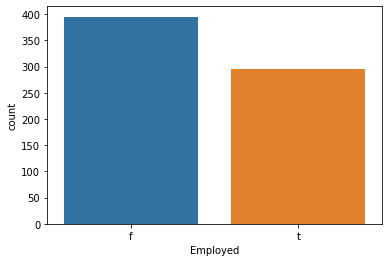

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Employed', data=cc_apps, order = cc_apps['Employed'].value_counts().index)

In [125]:
# More applicants are not employed

<AxesSubplot:xlabel='ApprovalStatus', ylabel='count'>

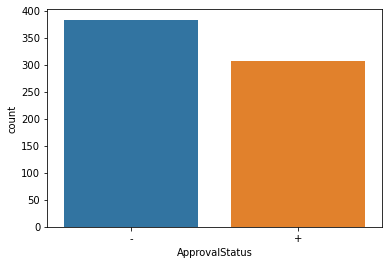

In [126]:
sns.countplot(x='ApprovalStatus', data=cc_apps, order = cc_apps['ApprovalStatus'].value_counts().index)

In [127]:
# More applicants were denied the credit card approval

<AxesSubplot:xlabel='PriorDefault', ylabel='count'>

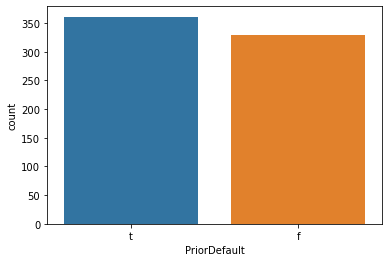

In [128]:
sns.countplot(x='PriorDefault', data=cc_apps, order = cc_apps['PriorDefault'].value_counts().index)

In [129]:
# large number of applicants had prior defaults

<AxesSubplot:ylabel='Frequency'>

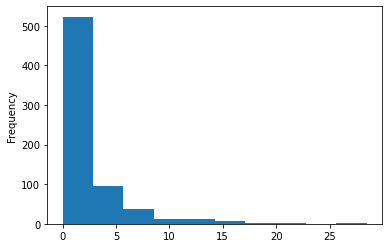

In [130]:
cc_apps['YearsEmployed'].plot.hist()

In [131]:
# The histogram suggests that many applicants are young employees who do not have as much experience

<AxesSubplot:ylabel='Frequency'>

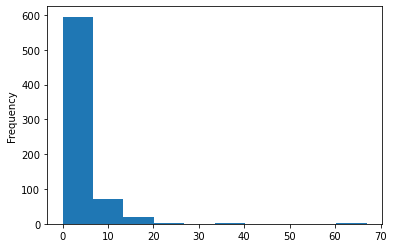

In [132]:
cc_apps['CreditScore'].plot.hist()

In [133]:
#The histogram suggests that most applicants had lower credit scores.

<AxesSubplot:ylabel='Frequency'>

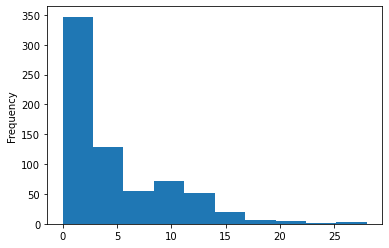

In [134]:
cc_apps['Debt'].plot.hist()

In [135]:
# In terms of debt, most applicants did not have much debt.

<AxesSubplot:>

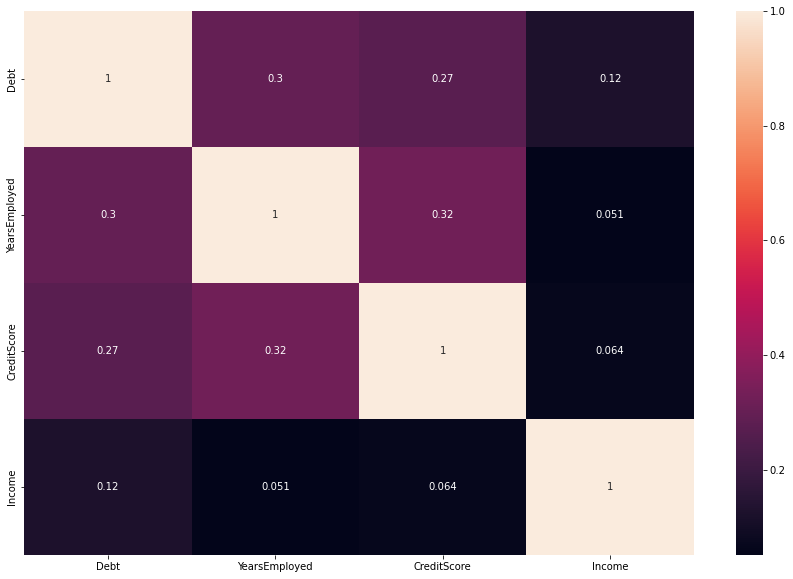

In [136]:
#Create heat map:

plt.figure(figsize=(15, 10))
sns.heatmap(cc_apps.corr(), annot=True)

# Data Manipulation

# Handling the missing values 


In [137]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace(["?"], np.NaN)

# Inspect the missing values again
cc_apps.tail(17)

    Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
673      ?  29.50   2.000       y            p              e         h   
674      a  37.33   2.500       u            g              i         h   
675      a  41.58   1.040       u            g             aa         v   
676      a  30.58  10.665       u            g              q         h   
677      b  19.42   7.250       u            g              m         v   
678      a  17.92  10.210       u            g             ff        ff   
679      a  20.08   1.250       u            g              c         v   
680      b  19.50   0.290       u            g              k         v   
681      b  27.83   1.000       y            p              d         h   
682      b  17.08   3.290       u            g              i         v   
683      b  36.42   0.750       y            p              d         v   
684      b  40.58   3.290       u            g              m         v   
685      b  21.08  10.085

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [138]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
pd.isna(cc_apps)
cc_apps.tail(17)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9600\1332258929.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc_apps.fillna(cc_apps.mean(), inplace=True)


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [139]:
# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])
    

# Count the number of NaNs in the dataset and print the counts to verify
cc_apps.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,b,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [140]:
# Import LabelEncoder
from sklearn import preprocessing

# Instantiate LabelEncoder
le = preprocessing.LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        le.fit(cc_apps[col])
        cc_apps[col]=le.transform(cc_apps[col])

# Preparing data for ML

In [141]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 'DriversLicense', 'ZipCode'
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis=1)

cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:12] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [142]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Logistic regression model 


In [143]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)


LogisticRegression()

# Making predictions and evaluating performance

In [144]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it

y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))


# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.8377192982456141


array([[93, 10],
       [27, 98]], dtype=int64)

# Hyperparameter optimization with grid search

In [145]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best Accuracy after hyperparameter optimization: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test))

Best Accuracy after hyperparameter optimization: 0.863651 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8377192982456141


# Use Case 2


# To illustrate data import from a Relational Data base and merge dataframes using a different dataset(indicators.SQLITE)

In [44]:

import pandas as pd

conn = sqlite3.connect('indicators.sqlite', isolation_level=None,
                      detect_types=sqlite3.PARSE_COLNAMES)

res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

Country
CountryNotes
Series
Indicators
SeriesNotes
Footnotes


In [45]:
df_Country = pd.read_sql_query('select * from Country',conn)
df_CountryNotes = pd.read_sql_query('select * from CountryNotes',conn)
df_Footnotes = pd.read_sql_query('select * from Footnotes',conn)
df_Indicators = pd.read_sql_query('select * from Indicators',conn)
df_Series = pd.read_sql_query('select * from Series',conn)
df_SeriesNotes = pd.read_sql_query('select * from SeriesNotes',conn)

In [46]:
df_CountryNotes.head()

,Countrycode,Seriescode,Description
0,ABW,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...
1,ABW,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014)
2,ABW,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014)
3,ABW,SM.POP.NETM,Data sources : United Nations World Population...
4,ABW,SM.POP.TOTL,Estimates are derived from data on foreign-bor...


In [47]:
df_Country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,...,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,...,,,2011. Population data compiled from administra...,,,Yes,,,2006,


In [48]:
type(df_Country['CountryCode'])

pandas.core.series.Series

In [49]:
type(df_CountryNotes['Countrycode'])

pandas.core.series.Series

In [50]:
mergedRes = pd.merge(df_Country, df_CountryNotes, left_on ='CountryCode', right_on='Countrycode', how='outer')

In [51]:
mergedRes.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Countrycode,Seriescode,Description
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000,AFG,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000,AFG,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000,AFG,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014)
3,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000,AFG,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014)
4,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000,AFG,NE.CON.PRVT.PP.CD,Estimates are based on regression.


In [52]:
df_Series.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",,Foreign direct investment are the net inflows ...,,Annual,,,,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",,Foreign direct investment are the net inflows ...,,Annual,,,Weighted average,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",,Foreign direct investment refers to direct inv...,,Annual,,,Sum,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",,Foreign direct investment are the net inflows ...,,Annual,,,Weighted average,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",,,,,,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",,Net capital account records acquisitions and d...,,Annual,,,,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open


In [53]:
mergedRes = pd.merge(mergedRes, df_Series, left_on ='Seriescode', right_on='SeriesCode', how='outer')

In [54]:
mergedRes.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,The DRS encourages debtor countries to volunta...,,,"World Bank, International Debt Statistics.",Data on external debt are gathered through the...,External indebtedness affects a country's cred...,,,,Open
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,The DRS encourages debtor countries to volunta...,,,"World Bank, International Debt Statistics.",Data on external debt are gathered through the...,External indebtedness affects a country's cred...,,,,Open
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,The DRS encourages debtor countries to volunta...,,,"World Bank, International Debt Statistics.",Data on external debt are gathered through the...,External indebtedness affects a country's cred...,,,,Open
3,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,The DRS encourages debtor countries to volunta...,,,"World Bank, International Debt Statistics.",Data on external debt are gathered through the...,External indebtedness affects a country's cred...,,,,Open
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,,Europe & Central Asia,Lower middle income,AM,...,The DRS encourages debtor countries to volunta...,,,"World Bank, International Debt Statistics.",Data on external debt are gathered through the...,External indebtedness affects a country's cred...,,,,Open
